In [6]:
# prompt: To check stationarity of time series data using augmented dickey fuller  test using a dataset

import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming your data is in a CSV file named 'time_series_data.csv' with a column named 'value'
# Replace 'time_series_data.csv' and 'value' with your actual file name and column name
try:
  data = pd.read_csv('/content/Gold_Price_DataSet.csv', index_col='Date') # Assuming 'Date' is your date/time index column
except FileNotFoundError:
  print("Error: '/content/Gold_Price_DataSet.csv' not found. Please upload your data file.")
  data = None
except KeyError:
    print("Error: 'Date' column not found in the CSV. Please specify correct index column name.")
    data = None

if data is not None:
    # Extract the time series data
    # The column name was changed from 'value' to 'Price'
    timeseries = data['Price'] # Assuming 'Price' is your time series data column

    # Perform the Augmented Dickey-Fuller test
    result = adfuller(timeseries)

    # Print the test results
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print(result[1])

    # Interpret the results
    if result[1] <= 0.05:
        print("The time series is likely stationary.")
    else:
        print("The time series is likely non-stationary.")

ADF Statistic: -3.140151
p-value: 0.023721
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
0.02372101223380104
The time series is likely stationary.


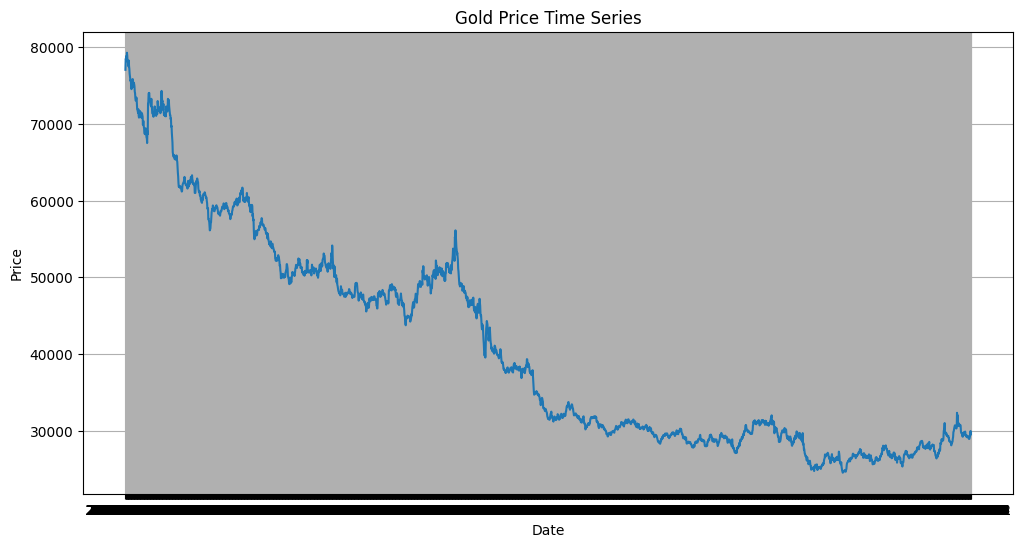

In [5]:
import matplotlib.pyplot as plt # Import the library for plotting

plt.figure(figsize=(12, 6))
plt.plot(data.index, timeseries)
plt.title('Gold Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

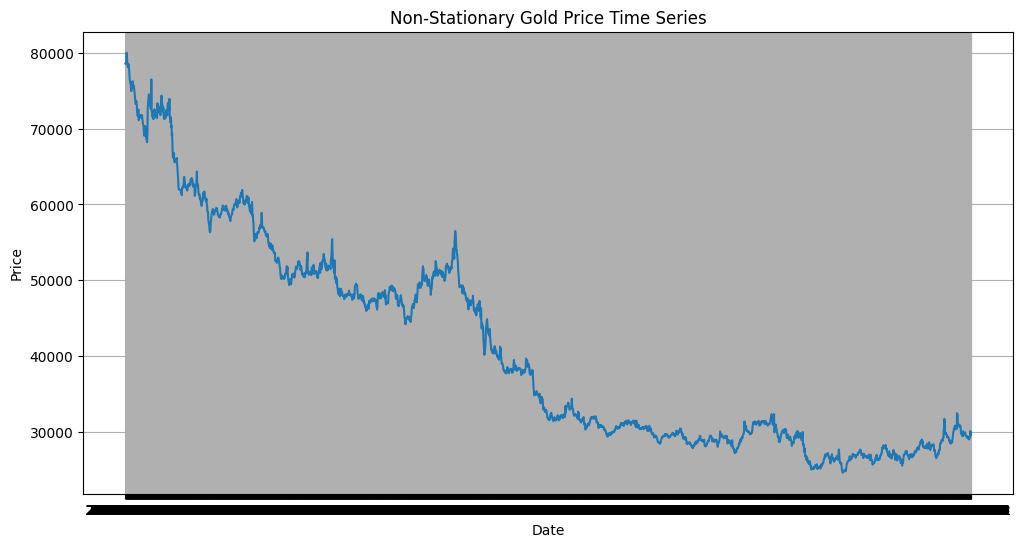

ADF Statistic: -3.0139341763837217
p-value: 0.033613455343050845
Time series is already stationary.


In [8]:
!pip install statsmodels
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Load your data (replace with your actual file path)
data = pd.read_csv('/content/Gold_Price_DataSet.csv', index_col='Date')
timeseries = data['High']

# Visualize the non-stationary data
plt.figure(figsize=(12, 6))
plt.plot(data.index, timeseries)
plt.title('Non-Stationary Gold Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Check for stationarity using Augmented Dickey-Fuller test
result = adfuller(timeseries)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If non-stationary (p-value > 0.05), apply differencing to make it stationary
if result[1] > 0.05:
    # First-order differencing
    stationary_timeseries = timeseries.diff().dropna()

    # Visualize the stationary data
    plt.figure(figsize=(12, 6))
    plt.plot(stationary_timeseries.index, stationary_timeseries)
    plt.title('Stationary Gold Price Time Series (After Differencing)')
    plt.xlabel('Date')
    plt.ylabel('Price Difference')
    plt.grid(True)
    plt.show()

    # Recheck stationarity after differencing (optional)
    result_stationary = adfuller(stationary_timeseries)
    print('\nADF Statistic (After Differencing):', result_stationary[0])
    print('p-value (After Differencing):', result_stationary[1])
else:
    print('Time series is already stationary.')